# Casos hipotéticos

## Imports

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,optimize
import tikzplotlib
import os

plt.style.use("seaborn")

In [123]:
def toLatex(name:str,export2tex=False):
    if not os.path.exists('latex'):
        os.makedirs('latex')
    if(export2Tex):
        tikzplotlib.clean_figure()
        tikzplotlib.save(f"./latex/{name}.tex")


## Modelo SIR

In [124]:
def SIR(y,t,beta,gamma):
    S,I,R = y
    dS = -beta * S * I / N
    dI = beta * S * I / N - gamma * I
    dR = gamma * I
    return dS,dI,dR

## Valores Iniciales

In [125]:
N=1000
I0 = 1
S0 = N-I0
R0 = 0
vals = [(0.667,0.08333),(0.5,0.08333),(0.333,0.08333)]
results = []
export2Tex = False

In [126]:
t = np.linspace(0.0,90,90)

In [127]:
for i in vals:
    beta,gamma = i
    results.append(integrate.odeint(SIR, (S0, I0, R0), t, args=(beta, gamma)))

In [128]:
figs=[]

## Susceptibles - Comparacion

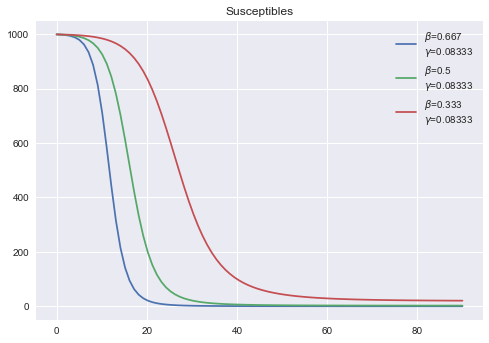

In [129]:
figs.append(plt.figure("Susceptibles"))
for i in range(0,len(vals)):
    plt.title("Susceptibles")
    plt.plot(t,results[i][:,0])
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})
toLatex("Comparison_1to1-Susceptibles",export2Tex)

## Infectados - Comparacion

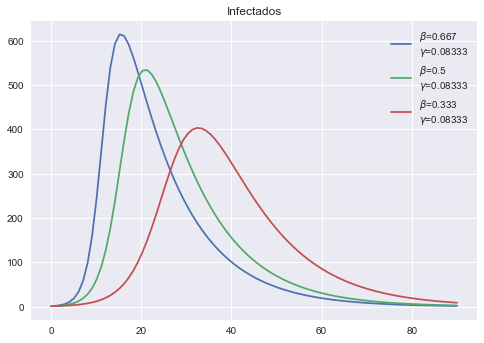

In [130]:
figs.append(plt.figure("Infectados"))
for i in range(0,len(vals)):
    plt.title("Infectados")
    plt.plot(t,results[i][:,1])
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})
toLatex("Comparison_1to1-Infectados",export2Tex)

## Recuperados - Comparacion

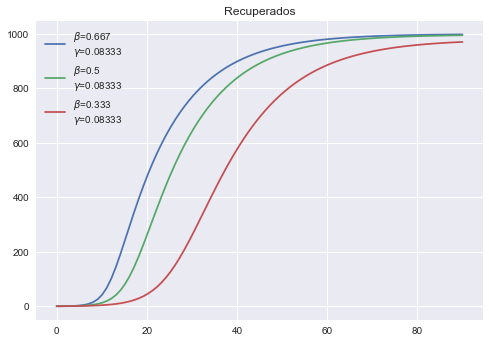

In [131]:
figs.append(plt.figure("Recuperados"))
for i in range(0,len(vals)):
    plt.title("Recuperados")
    plt.plot(t,results[i][:,2])
plt.legend([f"$\\beta$={i[0]}\n$\\gamma$={i[1]}" for i in vals],prop={'size': 10})
toLatex("Comparison_1to1-Recuperados",export2Tex)

## Casos individuales

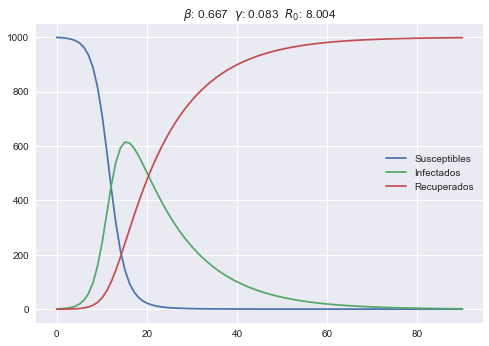

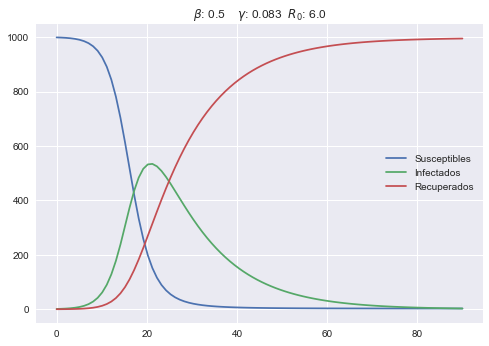

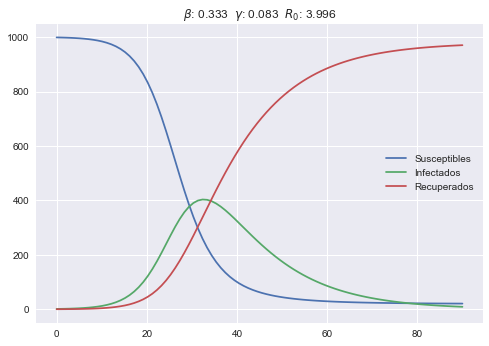

In [132]:
for i in range(0,len(vals)):
    figs.append(plt.figure(f"Comparison {i}"))
    plt.plot(t, results[i][:,0])
    plt.plot(t, results[i][:,1])
    plt.plot(t, results[i][:,2])
    plt.title(f"$\\beta$: {round(vals[i][0],3)}\t$\\gamma$: {round(vals[i][1],3)}\t $R_0$: {round(vals[i][0]/vals[i][1],3)}")
    plt.legend(["Susceptibles","Infectados","Recuperados"],prop={'size': 10})
    toLatex(f"Individual_all3[{i}]",export2Tex)